In [53]:
import numpy as np
from tensorflow import keras
from keras.layers import Input, Dense, concatenate
from sklearn.datasets import fetch_california_housing
# from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [54]:
#load data
housing_data = fetch_california_housing()
X = housing_data.data
Y = housing_data.target

In [55]:
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [56]:
# split into train, validation, and testing set
X_train_full, X_test, Y_train_full, Y_test = train_test_split(X,Y, random_state = 42)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_full, Y_train_full, random_state = 42)

In [57]:
print(X.shape)
print(Y.shape)

(20640, 8)
(20640,)


In [58]:
# define the input layers
input_A = Input(shape=(6,))
input_B = Input(shape=(2,))

# define the hidden layers
hidden_A = Dense(30, activation = 'relu')(input_A) # dense layer take A as input
hidden_B = Dense(30, activation = 'relu')(input_B)

# concatenate the output from the hidden layers
concat = concatenate([hidden_A,hidden_B])

# define the output layer
output = Dense(1)(concat) # dense layer is connected to the output of the previous layer

# define the model
model = keras.Model(inputs=[input_A,input_B], outputs=[output])

In [61]:
# compile the model
model.compile(optimizer='adam', loss = 'mse', metrics=['mae']) #MAE = mean absolute error

In [62]:
# train the model
final_result = model.fit([X_train[:, :6], X_train[:, 6:]],Y_train, 
                         validation_data = ([X_valid[:, :6], X_valid[:, 6:]],Y_valid), epochs= 10, batch_size = 32)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 7013.8218 - mae: 21.9389 - val_loss: 2.9719 - val_mae: 1.2771
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 2.7829 - mae: 1.2853 - val_loss: 2.8085 - val_mae: 1.2592
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 2.6105 - mae: 1.2558 - val_loss: 2.7150 - val_mae: 1.2868
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 2.4453 - mae: 1.2201 - val_loss: 2.5524 - val_mae: 1.1865
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 2.2532 - mae: 1.1738 - val_loss: 2.4240 - val_mae: 1.1908
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 1.6195 - mae: 1.0041 - val_loss: 1.2399 - val_mae: 0.7634
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7933 - mae: 0.6860 - val_loss: 1.3076 - val_mae: 0.6839
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss

In [63]:
mse, mae = model.evaluate([X_test[:,:6],X_test[:,6:]],Y_test)

162/162 [==============================] - 0s 764us/step - loss: 0.6278 - mae: 0.5866


In [64]:
import matplotlib.pyplot as plt

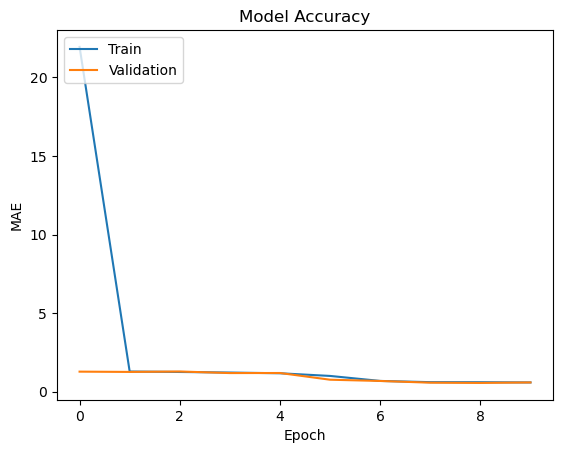

In [65]:
# Plot the training and validation accuracy over epochs
plt.plot(final_result.history['mae']) #plt.plot() is a function used to create a line plot of two or more arrays of data
plt.plot(final_result.history['val_mae'])
plt.title('Model Accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

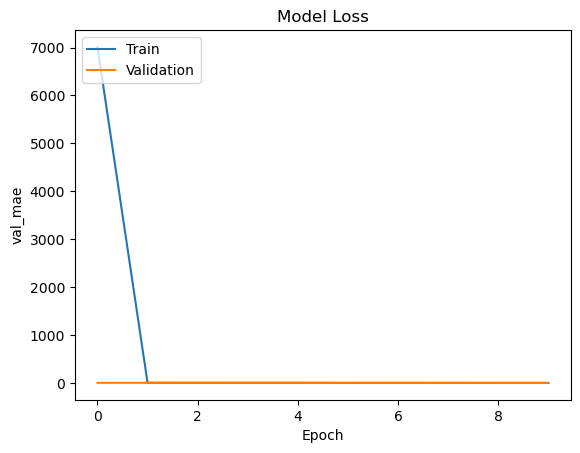

In [66]:
# Plot the training and validation loss over epochs
plt.plot(final_result.history['loss'])
plt.plot(final_result.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('val_mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()